In [51]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cab_data = pd.read_csv("Documents/dataset/Cab_Data.csv")
city_data = pd.read_csv("Documents/dataset/City.csv")
customerID_data = pd.read_csv("Documents/dataset/Customer_ID.csv")
transactionID_data =pd.read_csv("Documents/dataset/Transaction_ID.csv")

In [3]:
print(cab_data.info())
print(cab_data.shape)
cab_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
print(city_data.info())
print(city_data.shape)
city_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
print(customerID_data.info())
print(customerID_data.shape)
customerID_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
print(transactionID_data.info())
print(transactionID_data.shape)
transactionID_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Checking Null

In [7]:
duplicateRowsDF= cab_data[cab_data.duplicated()]

In [8]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []


In [9]:
cab_data.shape

(359392, 7)

In [10]:
cab_data.isnull().any()

Transaction ID    False
Date of Travel    False
Company           False
City              False
KM Travelled      False
Price Charged     False
Cost of Trip      False
dtype: bool

In [11]:
city_data.isnull().any()

City          False
Population    False
Users         False
dtype: bool

In [12]:
customerID_data.isnull().any()

Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
dtype: bool

In [13]:
transactionID_data.isnull().any()

Transaction ID    False
Customer ID       False
Payment_Mode      False
dtype: bool

In [14]:
duplicateRowsDF= city_data[city_data.duplicated()]

In [15]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [City, Population, Users]
Index: []


#### Creating Master Data

In [16]:
newdf=pd.merge(pd.merge(pd.merge(customerID_data, transactionID_data, on='Customer ID')
                        ,cab_data,on='Transaction ID')
                        ,city_data, on = 'City')

In [17]:
newdf

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [18]:
newdf.isnull().any()

Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
Transaction ID        False
Payment_Mode          False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Population            False
Users                 False
dtype: bool

In [19]:
masterdf=pd.merge(pd.merge(pd.merge(customerID_data,transactionID_data, on='Customer ID', how='inner')
                        ,cab_data,on ='Transaction ID')
                        ,city_data,on = 'City')   

In [20]:
masterdf

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [21]:
masterdf.isnull().any()

Customer ID           False
Gender                False
Age                   False
Income (USD/Month)    False
Transaction ID        False
Payment_Mode          False
Date of Travel        False
Company               False
City                  False
KM Travelled          False
Price Charged         False
Cost of Trip          False
Population            False
Users                 False
dtype: bool

In [22]:
#trying out xlrd to convert excel series date to python date
date_time =xlrd.xldate_as_datetime(newdf.iloc[0,6],0)
date_object = date_time.date()
print(date_object)

2016-01-08


In [23]:
newdf["Date of Travel"]=newdf["Date of Travel"].apply(lambda x : (xlrd.xldate_as_datetime(newdf.iloc[x,6],0)).date())

In [24]:
newdf["Profit"]=newdf["Price Charged"]- newdf["Cost of Trip"]

In [25]:
#count of unique customer ids  for each customer service pie chart
cab_preference = newdf.groupby('Company')['Customer ID'].nunique()
cab_preference 

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

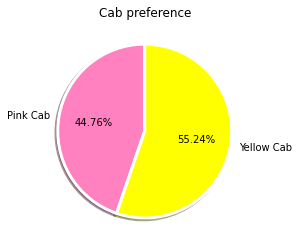

In [26]:
cab_label = cab_preference.index
cab_numbers = cab_preference.values
colors = ['#FF81C0','#FFFF00']
plt.pie(cab_numbers, labels = cab_label, autopct='%1.2f%%', startangle=90, shadow = True, colors = colors
        ,wedgeprops ={'linewidth':3, 'edgecolor': 'white'})
plt.title('Cab preference')
plt.show()

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


Text(0.5, 1.0, ' Count of unique customer-ids')

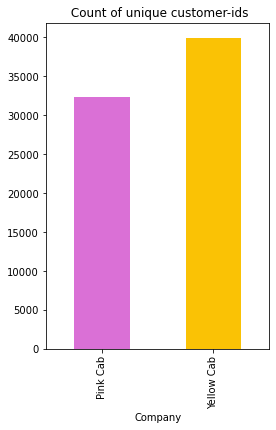

In [27]:
#count of unique customer ids  for each customer service bar chart
count_customer =newdf.groupby('Company')['Customer ID'].nunique()
print(count_customer)
count_customer.plot(kind ="bar", figsize =(4,6), color =['#DA70D6','#FAC205'])
plt.title(" Count of unique customer-ids")

In [28]:
#gender distribution of Pink and Yellow cab customers
genderwise_preference=newdf.groupby(['Company','Gender'])['Customer ID'].nunique()
genderwise_preference

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

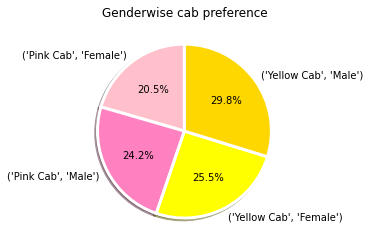

In [29]:
gender_label = genderwise_preference.index
gender_numbers =genderwise_preference.values
colors = ['#FFC0CB','#FF81C0','#FFFF00','#FFD700']
plt.pie(gender_numbers, labels = gender_label, autopct='%1.1f%%', startangle=90, shadow = True, colors = colors
        ,wedgeprops ={'linewidth':3, 'edgecolor': 'white'})
plt.title('Genderwise cab preference')
plt.show()

In [30]:
#average age of pink and yellow cab users 
newdf.groupby('Company')['Age'].mean()

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64

In [31]:
#average kilometers travelled by pink and yellow cab users
newdf.groupby('Company', as_index=False)['KM Travelled'].mean()

,Company,KM Travelled
0,Pink Cab,22.559917
1,Yellow Cab,22.569517


Text(0.5, 1.0, 'Payment mode preference')

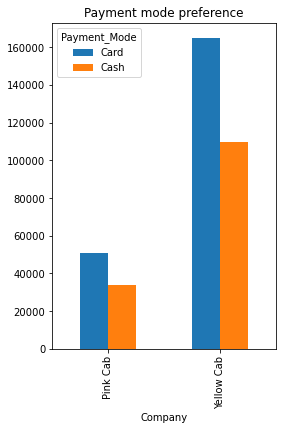

In [32]:
#Count of cash and card transactions
payment_mode=newdf.groupby(['Company','Payment_Mode']).size()
payment_mode.unstack().plot(kind ="bar", figsize =(4,6) )
plt.title("Payment mode preference")


Cities where Pink Cab is preffered over Yellow Cab

Company        Pink Cab  Yellow Cab
City                               
NASHVILLE TN       1841        1169
PITTSBURGH PA       682         631
SACRAMENTO CA      1334        1033
SAN DIEGO CA      10672        9816

Cities where Yellow Cab is preffered over Pink Cab

Company         Pink Cab  Yellow Cab
City                                
ATLANTA GA          1762        5795
AUSTIN TX           1868        3028
BOSTON MA           5186       24506
CHICAGO IL          9361       47264
DALLAS TX           1380        5637
DENVER CO           1394        2431
LOS ANGELES CA     19865       28168
MIAMI FL            2002        4452
NEW YORK NY        13967       85918
ORANGE COUNTY       1513        2469
PHOENIX AZ           864        1200
SEATTLE WA          2732        5265
SILICON VALLEY      3797        4722
TUCSON AZ            799        1132
WASHINGTON DC       3692       40045


Text(0.5, 1.0, 'Distribution of cab-users according to cities')

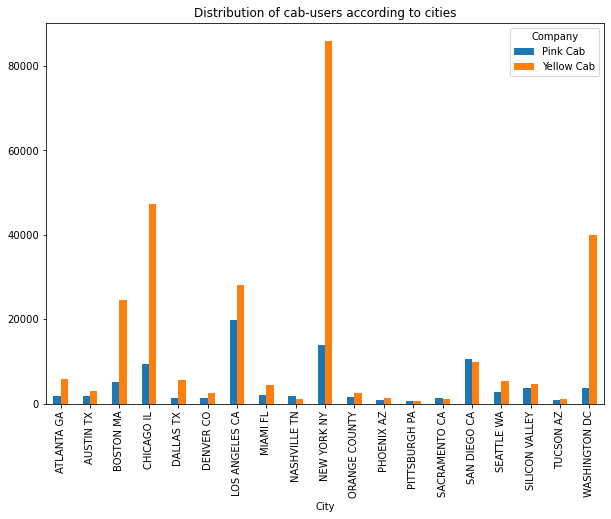

In [33]:
# numbers of customers from  each cities for both cab services
city_dist=newdf.groupby(['City', 'Company']).size().unstack()
print('\n'+ '\033[1m' + "Cities where Pink Cab is preffered over Yellow Cab"+ '\033[0m' +'\n')
print(city_dist.query("`Pink Cab` > `Yellow Cab`"))
print('\n'+ '\033[1m' + "Cities where Yellow Cab is preffered over Pink Cab"+ '\033[0m' + '\n')
print(city_dist.query("`Yellow Cab` > `Pink Cab`"))
city_dist.plot(kind='bar', figsize =(10,7))
plt.title("Distribution of cab-users according to cities")

Text(0.5, 1.0, 'Distribution of cab-users as per age')

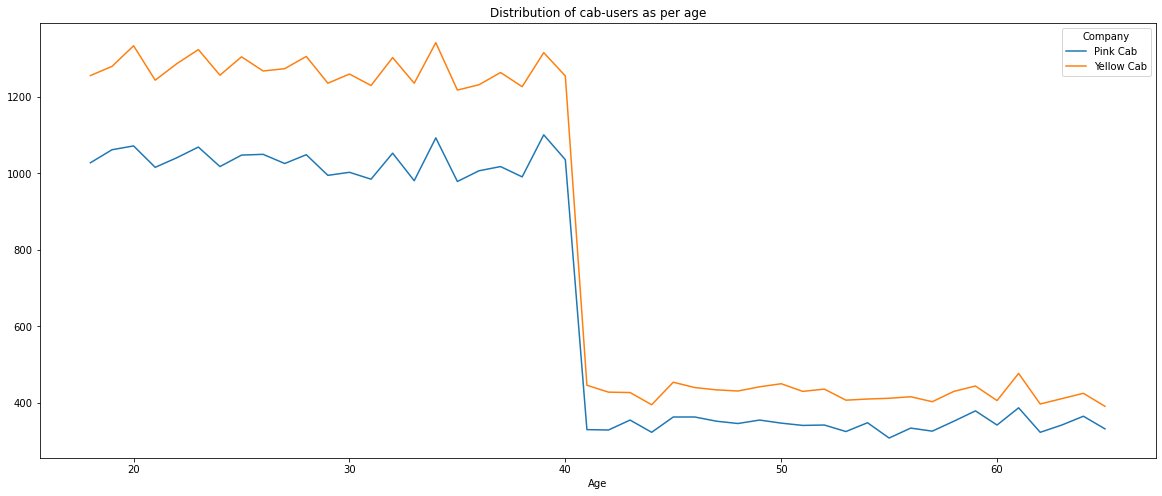

In [34]:
#age distribution
age_dist=newdf.groupby(['Age','Company'])['Customer ID'].nunique().unstack()
#age_dist
age_dist.plot(kind='line', figsize =(20, 8))
plt.title("Distribution of cab-users as per age")

#### Yellow Cab is preffered among all age groups, also its notable that between the ages of 18 - 40 there is marked cab use of both the companies compared to users between ages 41 - 65  

### Q. Which company has the maximum cab users at a particular time period?

In [35]:
# derive and insert 'Year' seperately for ease of coding in the dataset 
newdf['Year']=pd.DatetimeIndex(newdf['Date of Travel']).year
newdf.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Year
0,29290,Male,28,10813,10000011,Card,2017-10-27,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",57.3150,2017
1,29290,Male,28,10813,10351127,Cash,2016-12-29,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",281.2772,2016
2,29290,Male,28,10813,10412921,Card,2017-12-17,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",194.6480,2017
3,27703,Male,27,9237,10000012,Card,2017-06-02,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",23.6660,2017
4,27703,Male,27,9237,10320494,Card,2017-03-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",253.9808,2017


In [36]:
#get the unique counts of cab users for each of the company for the years
year_count = newdf.groupby(['Company','Year'])['Customer ID'].nunique()
year_count

Company     Year
Pink Cab    2016    16842
            2017    19363
            2018    17509
Yellow Cab  2016    26214
            2017    28224
            2018    26710
Name: Customer ID, dtype: int64

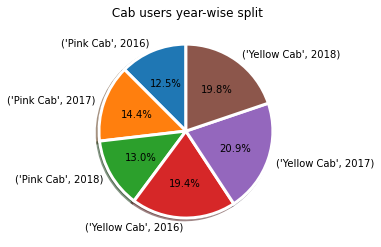

In [37]:
plt.pie(year_count.values, labels = year_count.index, autopct='%1.1f%%', startangle=90, shadow = True 
        ,wedgeprops ={'linewidth':3, 'edgecolor': 'white'})
plt.title(' Cab users year-wise split')
plt.show()

<AxesSubplot:xlabel='Company'>

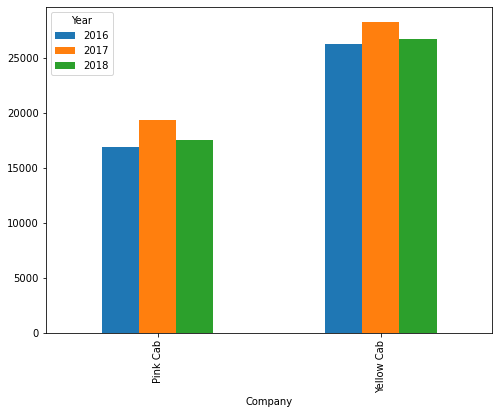

In [38]:
#colors = ['#FFC0CB','#FF81C0','#DDA0DD','#FFFF00','#FFD700','#FAC205']
year_count.unstack().plot(kind ="bar", figsize =(8,6) )

#### A: Yellow Cab has the maximum cab users in year 2017

In [39]:
newdf

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Year
0,29290,Male,28,10813,10000011,Card,2017-10-27,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",57.3150,2017
1,29290,Male,28,10813,10351127,Cash,2016-12-29,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",281.2772,2016
2,29290,Male,28,10813,10412921,Card,2017-12-17,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",194.6480,2017
3,27703,Male,27,9237,10000012,Card,2017-06-02,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",23.6660,2017
4,27703,Male,27,9237,10320494,Card,2017-03-19,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",253.9808,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,2016-08-07,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",143.6180,2016
359388,51406,Female,29,6829,10319775,Cash,2016-01-02,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",23.0464,2016
359389,51406,Female,29,6829,10347676,Card,2018-09-16,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",-5.8540,2018
359390,51406,Female,29,6829,10358624,Cash,2017-12-10,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",-6.0900,2017


<AxesSubplot:xlabel='City', ylabel='Profit'>

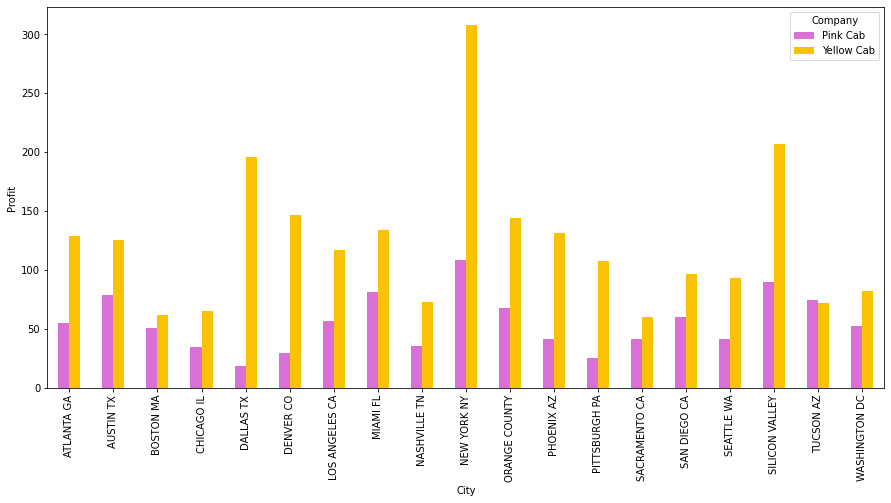

In [40]:
#average profits for both the companies city wise
colors =['#DA70D6','#FAC205']
newdf.groupby(['City', 'Company'])['Profit'].mean().unstack().plot(kind ='bar', figsize=(15,7), ylabel ='Profit', color = colors)

<AxesSubplot:xlabel='Year', ylabel='Profit'>

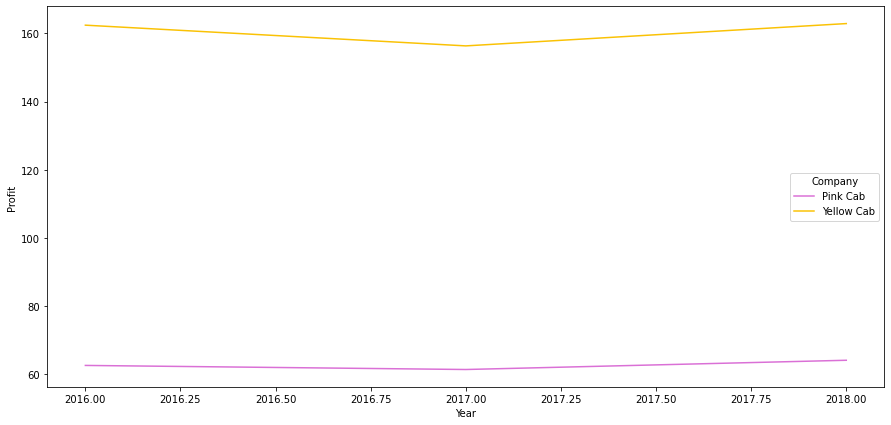

In [50]:
yearly_profit=newdf.groupby(['Year', 'Company'])['Profit'].mean().unstack()
yearly_profit.plot(kind ='line', figsize=(15,7), ylabel ='Profit', color = colors)
#average profit dipped for both cab companies during year 2017

## Hypothesis : using chi2 testing

In [131]:
def hypothesis(cross_table):
    chi2, pval, dof, expected = stats.chi2_contingency(cross_table)
    print("chi\u00b2 statistic = " + str(chi2))
    print("degree of freedom = " + str(dof))
    print("pval = " + str(pval))
    alpha = 0.05
    if pval < alpha:
        print("Reject null hypothesis")
    else:
        print("Accept null hypothesis")


### H0 = Genders do not have  cab company preference
### H1 = Genders have cab company preference        

In [137]:
gender_preference = pd.crosstab(newdf['Gender'],newdf['Company'])
print(gender_preference)
hypothesis(gender_preference)

Company  Pink Cab  Yellow Cab
Gender                       
Female      37480      116000
Male        47231      158681
chi² statistic = 107.22063897254299
degree of freedom = 1
pval = 3.982674650131372e-25
Reject null hypothesis


### H0 = There is no relationship between payment mode and cab company
### H1 = There is relationship between payment mode and cab company

In [148]:
#sample_data = newdf.sample(int(0.1*len(newdf)))
#print(sample_data)
cab_profits = pd.crosstab(newdf['Payment_Mode'],newdf['Company'])
print(cab_profits)
hypothesis(cab_profits)

Company       Pink Cab  Yellow Cab
Payment_Mode                      
Card             50719      164785
Cash             33992      109896
chi² statistic = 0.3733235887859897
degree of freedom = 1
pval = 0.5411981778304723
Accept null hypothesis


### H0 = Age groups do not have preference towards a particular cab company
### H1 = Age groups have preference towards a particular cab company

In [166]:
sample_data = newdf.sample(int(0.1*len(newdf)))
#print(sample_data)
sample_a = sample_data[sample_data['Company'] == 'Yellow Cab']['Age']
sample_b = sample_data[sample_data['Company'] == 'Pink Cab']['Age']
#print(sample_a)
#print(sample_b)
ttest, pval = stats.ttest_ind(sample_a, sample_b)
print(ttest)
print(pval)
if pval < alpha:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

-0.4974706763980342
0.6188602201414324
Accept null hypothesis
